In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [6]:
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

The shape of the array tells us that our dataset x_train consists of:
50000 images
32 pixels in height
32 pixels in width
3 pixels in depth (corresponding to Red, Green and Blue)

In [7]:
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [10]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [13]:
import  matplotlib.pyplot as plt
%matplotlib inline

To print an image

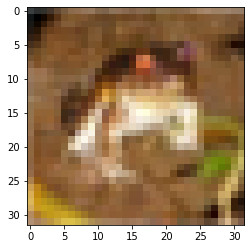

In [24]:
img = plt.imshow(x_train[0])

To print the label

In [25]:
print("the label is:", y_train[1])

the label is: [9]


10 different classes so 10 different labels.

In [28]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train,10)
y_test_one_hot = keras.utils.to_categorical(y_test,10)

In [30]:
y_train_one_hot[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [33]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [34]:
print(x_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


BUILDING AND TRAINING THE CNN

SETTING UP THE ARCHITECTURE

In [39]:
from keras import Sequential
from keras.layers import Dense,  Dropout, Flatten, Conv2D, MaxPooling2D

In [40]:
model = Sequential()

In [42]:
model.add(Conv2D(32,(3,3), activation = 'relu', padding =  'same', input_shape = (32,32,3)))

The first number 32 refers to the depth. The next pair of numbers (3,3) refer to the filter width and size. Then, we specify activation which is ‘relu’ and padding which is ‘same’. Notice that we did not specify stride. This is because stride=1 is a default setting, and unless we want to change this setting, we need not specify it.

In [43]:
model.add(Conv2D(32,(3,3), activation = 'relu', padding =  'same'))

In [44]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [45]:
model.add(Dropout(0.25))

In [46]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

However, at this point, our neurons are spatially arranged in a cube-like format rather than in just one row. To make this cube-like format of neurons into one row, we have to first flatten it. We do so by adding a Flatten layer:

In [47]:
model.add(Flatten())

In [48]:
model.add(Dense(512, activation='relu'))

In [49]:
model.add(Dropout(0.5))

In [50]:
model.add(Dense(10, activation='softmax'))

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

Model Created now time to compile

In [52]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [53]:
hist = model.fit(x_train,y_train_one_hot, batch_size = 32, epochs=20, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 131s 3ms/step - loss: 1.5393 - accuracy: 0.4353 - val_loss: 1.1886 - val_accuracy: 0.5709
Epoch 2/20
40000/40000 [==============================] - 135s 3ms/step - loss: 1.1383 - accuracy: 0.5959 - val_loss: 0.9777 - val_accuracy: 0.6526
Epoch 3/20
40000/40000 [==============================] - 147s 4ms/step - loss: 0.9814 - accuracy: 0.6522 - val_loss: 0.8586 - val_accuracy: 0.6992
Epoch 4/20
40000/40000 [==============================] - 147s 4ms/step - loss: 0.8786 - accuracy: 0.6908 - val_loss: 0.8358 - val_accuracy: 0.7091
Epoch 5/20
40000/40000 [==============================] - 141s 4ms/step - loss: 0.8078 - accuracy: 0.7147 - val_loss: 0.7538 - val_accuracy: 0.7377
Epoch 6/20
40000/40000 [==============================] - 143s 4ms/step - loss: 0.7625 - accuracy: 0.7307 - val_loss: 0.7335 - val_accuracy: 0.7426
Epoch 7/20
40000/40000 [==============================] - 196s

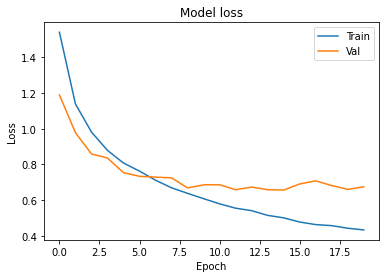

In [54]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

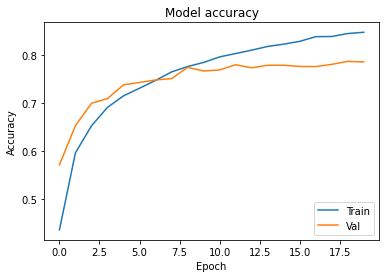

In [56]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [57]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 11s 1ms/step


0.7760999798774719

In [60]:
model.save('my_cifar10_model.h5')

In [61]:
from keras.models import load_model
model = load_model('my_cifar10_model.h5')